# Practice Notebook

## Observations and Insights 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on= 'Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [103]:
test = mouse_study.groupby(['Drug Regimen'])
test.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [26]:
# Checking the number of mice.

# creating a list of mice ID's
mouse_ids = mouse_study["Mouse ID"].values

# converting the list to a set of unique value
unique_mice = set(mouse_ids)

# finding its length, which is the number of unique values
number_of_unique_mice = len(unique_mice)

print(f"There are {number_of_unique_mice} mice in the study.")


There are 249 mice in the study.


In [38]:
# Finding the duplicate mice 
# Seeing which Mouse ID numbers have duplicated Timepoint values. 

# obtaining the rows in the dataframe which are duplicated, by considering the two appropriate columns
duplicate_rows = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]

print("The duplicated rows based on two columns are:")
print(f"{duplicate_rows}")
print("")

# obtaining the ID of the mouse that has duplicated data
mouse_duplicate_id = duplicate_rows.iloc[1,0]

print(f"The ID number of the mouse with duplicated data is {mouse_duplicate_id}.")

The duplicated rows based on two columns are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  

The ID number of the mouse with duplicated data is g989.


In [40]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study.loc[mouse_study["Mouse ID"] != mouse_duplicate_id, :]

In [41]:
# Checking the number of mice in the clean DataFrame to ensure there is now 248.

mouse_ids = clean_mouse_data["Mouse ID"].values
unique_mice = set(mouse_ids)
number_of_unique_mice = len(unique_mice)
print(f"There are {number_of_unique_mice} mice in the study after removing the mouse with duplicate data.")

There are 248 mice in the study after removing the mouse with duplicate data.


In [ ]:
test = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
test

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]

mouse_duplicate = duplicate_rows['Mouse ID']

print("Duplicate Rows based on 2 columns are:", duplicate_rows, sep='\n')

mouse_duplicate_id = duplicate_rows.iloc[1,0]

print(f"The ID number of the mouse with duplicated data is {mouse_duplicate_id}")

Duplicate Rows based on 2 columns are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  
The ID number of the mouse with duplicated data is g989


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study.loc[mouse_study["Mouse ID"] != mouse_duplicate_id, :]
clean_mouse_data

In [ ]:
# Checking the number of mice in the clean DataFrame.

mouse_ids = clean_mouse_data["Mouse ID"].values
unique_mice = set(mouse_ids)
number_of_unique_mice = len(unique_mice)
print(f"There are {number_of_unique_mice} mice in the study after removing the mouse with duplicate data.")

## Summary Statistics

In [47]:
# option 1
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# grouping the mouse data by regimen
grouped_mouse_data = clean_mouse_data.groupby(['Drug Regimen'])

mean = grouped_mouse_data["Tumor Volume (mm3)"].mean()

median = grouped_mouse_data["Tumor Volume (mm3)"].median()

mode = grouped_mouse_data["Tumor Volume (mm3)"].agg(pd.Series.mode)
mode

mode2 = grouped_mouse_data["Tumor Volume (mm3)"].agg(lambda x:x.value_counts().index[0])
mode2

# both mode options give 45 as the mode for eerything?? not sure if this is right??

variance = grouped_mouse_data["Tumor Volume (mm3)"].var()
variance

standard_deviation = grouped_mouse_data["Tumor Volume (mm3)"].std()
standard_deviation

sem = grouped_mouse_data["Tumor Volume (mm3)"].sem()
sem

summary_mouse_df = pd.DataFrame({"Mean": mean,
                                "Median": median,
                                "Mode": mode,
                                "Variance": variance,
                                "Standard Deviation": standard_deviation,
                                "SEM": sem})
summary_mouse_df

,Mean,Median,Mode,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,45.0,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,45.0,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,45.0,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,45.0,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,45.0,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,45.0,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,45.0,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,45.0,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,45.0,59.450562,7.710419,0.573111


In [57]:
# Option 2, simpler
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# THIS WORKS THE BEST
# This method produces everything in a single groupby function
import numpy as np
# oorrrrr
# grouping the mouse data by regimen
grouped_mouse_data = clean_mouse_data.groupby(['Drug Regimen'])

# creating the summary dataframe by applying the specific functions to the Tumour Volume column and changing the column names
summary = pd.DataFrame(grouped_mouse_data["Tumor Volume (mm3)"].agg([np.mean, np.median, pd.Series.mode, np.var, np.std, "sem"])
.rename(columns = {"mean":"Mean", "median":"Median", "mode":"Mode", "var":"Variance", "std":"Standard Deviation", "sem":"SEM"}))

# adding a second index above the column names to indicate that the data is regarding tumour volume
summary.columns = pd.MultiIndex.from_product([['Tumour Volume:'],summary.columns])

summary

Tumour Volume:                                                 \
                       Mean     Median  Mode   Variance Standard Deviation   
Drug Regimen                                                                 
Capomulin         40.675741  41.557809  45.0  24.947764           4.994774   
Ceftamin          52.591172  51.776157  45.0  39.290177           6.268188   
Infubinol         52.884795  51.820584  45.0  43.128684           6.567243   
Ketapril          55.235638  53.698743  45.0  68.553577           8.279709   
Naftisol          54.331565  52.509285  45.0  66.173479           8.134708   
Placebo           54.033581  52.288934  45.0  61.168083           7.821003   
Propriva          52.320930  50.446266  45.0  43.852013           6.622085   
Ramicane          40.216745  40.673236  45.0  23.486704           4.846308   
Stelasyn          54.233149  52.431737  45.0  59.450562           7.710419   
Zoniferol         53.236507  51.818479  45.0  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

In [53]:
# another option = not as nice visually
import numpy as np
# grouping the mouse data by regimen
grouped_mouse_data = clean_mouse_data.groupby(['Drug Regimen'])


summary2 = pd.DataFrame(grouped_mouse_data["Tumor Volume (mm3)"].agg([np.mean, np.median, st.mode, np.var, np.std, "sem"])
.rename(columns = {"mean":"Mean", "median":"Median", "mode":"Mode", "var":"Variance", "std":"Standard Deviation", "sem":"SEM"}))
                       
summary2

,Mean,Median,Mode,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,"([45.0], [25])",24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,"([45.0], [25])",39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,"([45.0], [25])",43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,"([45.0], [25])",68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,"([45.0], [25])",66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,"([45.0], [25])",61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,"([45.0], [24])",43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,"([45.0], [25])",23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,"([45.0], [24])",59.450562,7.710419,0.573111


## Bar and Pie Charts

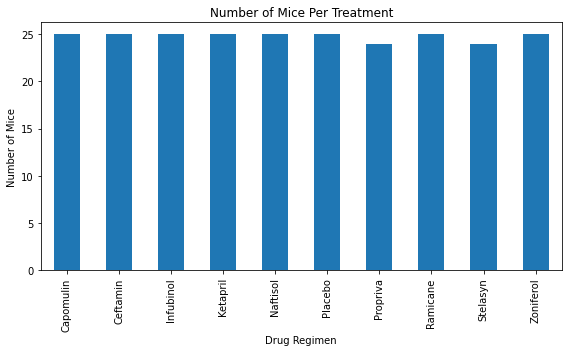

In [65]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Creating a dataframe that includes one occurance of each mouse, removing all but the first occuring time points
unique_mice_df = clean_mouse_data.drop_duplicates(subset = 'Mouse ID', keep = 'first')


# Creating a new dataframe that is grouped by 'Drug Regimen', where the columns are counted to get the number of mice
grouped_regimen_df = unique_mice_df.groupby(["Drug Regimen"]).count()

# Simplifying the datframe to just include the Drug Regimen index and the Mouse ID column
mice_per_treatment = grouped_regimen_df["Mouse ID"]


# Plotting the bar chart directly from the dataframe
mice_per_treatment_chart = mice_per_treatment.plot(kind = "bar", title = "Number of Mice Per Treatment", figsize=(8,5))
mice_per_treatment_chart.set_ylabel("Number of Mice")
plt.tight_layout()



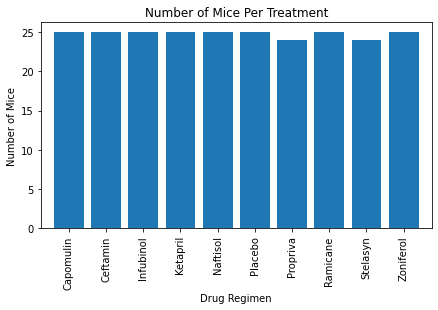

In [66]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# py plot is plt.bar(x axis, y axis)
# so will need series/;lists
# but can still base it off a table I believe

# Will be obtaining data from grouped_regimen_df created above

# Setting x axis as a numbered list, setting y axis as the values of the Mouse ID colunm 
x_axis = np.arange(len(grouped_regimen_df))
y_axis = grouped_regimen_df["Mouse ID"]

# Creating tick locations and setting the xticks values as the index of the dataframe
tick_locations = [value for value in x_axis]
xticks = grouped_regimen_df.index

# Plotting the chart
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, xticks, rotation="vertical")
plt.tight_layout()

# Set x limits for neatness of x axis
plt.xlim(-0.75, len(x_axis)- 0.25)

#setting a title and labels
plt.title("Number of Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()



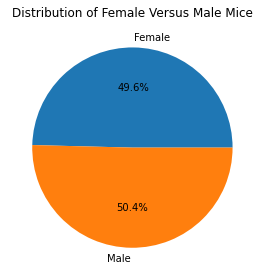

In [75]:
# Generating a pie plot showing the distribution of female versus male mice using pandas

# Referencing unique_mice_df because require only one occurance of each mouse
# Grouping the dataframe by the sex of the mice and applying a count
grouped_by_sex_df = unique_mice_df.groupby(["Sex"]).count()

# Simplifying the datframe to just include the 'Sex' index and the Mouse ID column
mice_per_sex = grouped_by_sex_df["Mouse ID"]

# Plotting the pie chart from the dataframe
mice_per_sex_chart = mice_per_sex.plot(kind = "pie", title = "Distribution of Female Versus Male Mice", autopct="%1.1f%%")
mice_per_sex_chart.set_ylabel("")
plt.tight_layout()


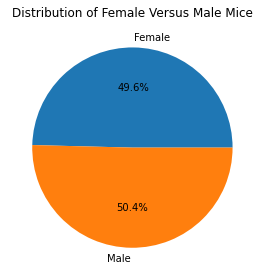

In [85]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot
# referencing the grouped dataframe created above
values = grouped_by_sex_df["Mouse ID"]
labels = grouped_by_sex_df.index

distribution_of_sex_chart = plt.pie(values, labels = labels, autopct="%1.1f%%")
plt.title("Distribution of Female Versus Male Mice")
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [87]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Adjusting the dataframe to contain the last occurance of each Mouse ID
# This will be the last timepoint where data was recorded, and therefore the final tumour volume for each mouse
last_timepoint_df = clean_mouse_data.drop_duplicates(subset = 'Mouse ID', keep = 'last')


In [101]:
last_timepoint_df["Tumor Volume (mm3)"]

9       22.050126
19      23.343598
29      28.484033
39      28.430964
49      29.128472
          ...    
1859    45.934712
1862    48.710661
1872    62.754451
1882    65.741070
1892    73.867845
Name: Tumor Volume (mm3), Length: 248, dtype: float64

In [90]:
# Creating a list of treatments 
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating empty list to fill with tumour vol data 
tumour_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Looping through each treatment
for treatment in treatments: 
    
    # Using loc to set the data frame to only contain the treatment being considered at that time
    treatment_data = last_timepoint_df.loc[(last_timepoint_df["Drug Regimen"] == treatment),:]
    
    # Accessing the Tumour Volume column for that treatment and setting it as a list
    tumour_data = treatment_data["Tumor Volume (mm3)"]
    tumour_data_list = tumour_data.tolist()
    
  
    # Calculating the upper and lower bounds to check for outliers
    quartiles = tumour_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Printing the upper and lower bounds
    print(f"")
    print(f"Values below {lower_bound} could be outliers for {treatment}.")
    print(f"Values above {upper_bound} could be outliers for {treatment}.")
    
    # Checking for values that are outliers and setting them as a list
    outliers = treatment_data.loc[(treatment_data["Tumor Volume (mm3)"] < lower_bound) | (treatment_data["Tumor Volume (mm3)"] > upper_bound)]["Tumor Volume (mm3)"]
    outliers_value =  outliers.tolist()   
    
    # Printing the outliers if they exist, or stating there are none if they don't
    if len(outliers) == 0:
        print(f"There are no outliers for {treatment}.") 
    elif len(outliers) == 1:
        print(f"There is one outlier for {treatment}. It is {outliers_value[0]}.")
    elif len(outliers) == 2:
        print(f"There are two outliers for {treatment}. They are {outliers_value[0]} and {outliers_value[1]}.")
    else:
        print(f"There are more than two outliers for {treatment}.")
    
    # adding the tumour data for the individul treatment to the list for plotting
    tumour_volume_data.append(tumour_data_list)
   





Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
There are no outliers for Capomulin.

Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
There are no outliers for Ramicane.

Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
There is one outlier for Infubinol. It is 36.321345799999996.

Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.
There are no outliers for Ceftamin.


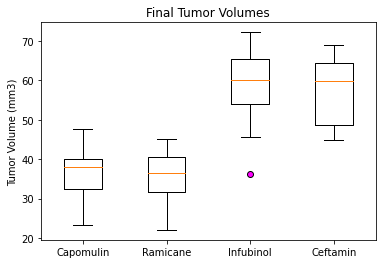

In [92]:
# Generating a box plot of the final tumor volume of each mouse across four regimens of interest
# creating a symbol for the outlier
green_diamond = dict(markerfacecolor='fuchsia', marker='o')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumour_volume_data, flierprops = green_diamond)
ax1.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

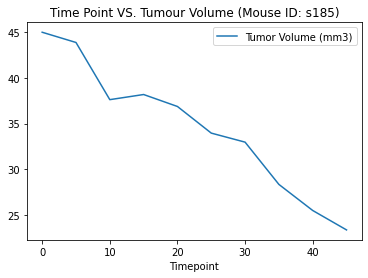

In [95]:
# Generating a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Adjusting the dataframe to contain only Capomulin data and the relevant columns
capomulin_data = clean_mouse_data.loc[(clean_mouse_data["Drug Regimen"] == "Capomulin"), ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Looking at Mouse ID: s185, adjusting the dataframe to contain relevant information
s185_df = capomulin_data.loc[(capomulin_data["Mouse ID"] == "s185"), ["Timepoint", "Tumor Volume (mm3)"]]

# Plotting time point vs. tumour volume for s185
graph = s185_df.plot(kind = "line", x = "Timepoint",  title = "Time Point VS. Tumour Volume (Mouse ID: s185)")



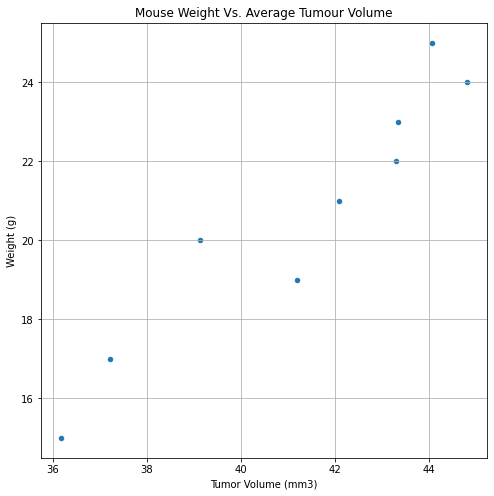

In [104]:
# Generating a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Adjusting the dataframe to contain only Capomulin data and the relevant columns
capomulin_weight_df = clean_mouse_data.loc[(clean_mouse_data["Drug Regimen"] == "Capomulin"), ["Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]

# Grouping the dataframe by weight and finding the average tumour volume
group_by_weight_df = capomulin_weight_df.groupby(["Weight (g)"], as_index = False).mean()

# Plotting weight vs. average tumour volume
chart = group_by_weight_df.plot(kind="scatter", y= "Weight (g)", x="Tumor Volume (mm3)", grid=True, figsize=(8,8),title="Mouse Weight Vs. Average Tumour Volume")
plt.show()


Text(0.5, 0, 'Tumor Volume (mm3)')

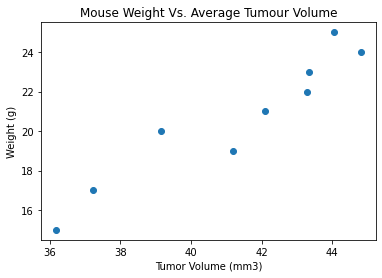

In [105]:
# making graph using matplotlib to see if that is better

group_by_weight_df

weight = group_by_weight_df.iloc[:,0]
tumour_volume = group_by_weight_df.iloc[:,1]
plt.scatter(tumour_volume, weight)
plt.title("Mouse Weight Vs. Average Tumour Volume")
plt.ylabel("Weight (g)")
plt.xlabel("Tumor Volume (mm3)")


## Correlation and Regression

The correlation between both factors is 0.95


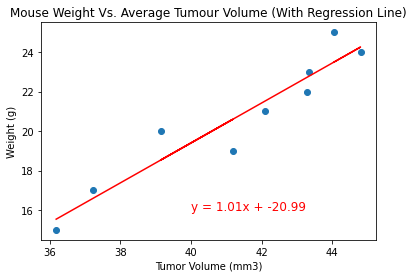

In [111]:
# Calculating the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Using group_by_weight_df 
# Setting variables
weight = group_by_weight_df.iloc[:,0]
tumour_volume = group_by_weight_df.iloc[:,1]

# calculating correlation
correlation = st.pearsonr(tumour_volume, weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# put this at the top
from scipy.stats import linregress

# Calculating Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumour_volume, weight)
regress_values = tumour_volume * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the scatterplot and regression model
plt.scatter(tumour_volume, weight)
plt.title("Mouse Weight Vs. Average Tumour Volume (With Regression Line)")
plt.ylabel("Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
plt.plot(tumour_volume,regress_values,"r-")
plt.annotate(line_eq,(40,16), fontsize=12,color="red")
plt.show()
